<a href="https://colab.research.google.com/github/meichenfang/Poisson-regression/blob/main/demos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font size="+4"><center> Demonstrations </center></font> 

# Load packages

In [213]:
%cd ../RADOM

# restrict numpy to use only one core, otherwise it will use all cores when doing @
import os
os.environ["BLAS_NUM_THREADS"] = "1" 
os.environ["OPENBLAS_NUM_THREADS"] = "1" # 


from inference import Trajectory
from plotting import *
from models.two_species import get_Y

/home/mffang/workspace/Poisson-regression/RADOM


In [221]:
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('image', cmap='RdBu')

In [215]:
def simulate_data(topo, tau, n, p, loga_max=4, logb_max=2, random_seed=42):
    np.random.seed(random_seed)
    L=len(topo)
    n_states=len(set(topo.flatten()))
    t=np.linspace(tau[0],tau[-1],n)
    true_t = []
    
    theta=np.zeros((p,n_states+4))
    for j in range(n_states+2):
        theta[:,j]=np.exp(np.random.uniform(0,loga_max,size=p))-1+1e-3
    theta[:,-2]=np.exp(np.random.uniform(0,logb_max,size=p))
    theta[:,-1]=np.exp(np.random.uniform(0,logb_max,size=p))
    
    Y = np.zeros((n*L,p,2))
    for l in range(L):
        theta_l = np.concatenate((theta[:,topo[l]], theta[:,-4:]), axis=1)
        Y[l*n:(l+1)*n] = get_Y(theta_l,t,tau) # m*p*2
        true_t = np.append(true_t,t)

    X = np.random.poisson(Y)
    return theta, true_t, Y, X,

In [216]:
def simulate_data_null(topo, tau, n, true_p, null_p, loga_max=4, logb_max=2, random_seed=42):
    np.random.seed(random_seed)
    L=len(topo)
    n_states=len(set(topo.flatten()))
    t=np.linspace(tau[0],tau[-1],n)
    true_t = []
    p = true_p + null_p
    
    theta=np.zeros((p,n_states+4))
    for j in range(n_states+2):
        theta[:,j]=np.exp(np.random.uniform(0,loga_max,size=p))-1+1e-3
    theta[:,-2]=np.exp(np.random.uniform(0,logb_max,size=p))
    theta[:,-1]=np.exp(np.random.uniform(0,logb_max,size=p))
    
    for j in range(n_states):
        theta[true_p:,j]=theta[true_p:,n_states]
    theta[true_p:,-2] = 1
    theta[true_p:,-1] = theta[true_p:,-4]/theta[true_p:,-3]
    
    Y = np.zeros((n*L,p,2))
    for l in range(L):
        theta_l = np.concatenate((theta[:,topo[l]], theta[:,-4:]), axis=1)
        Y[l*n:(l+1)*n] = get_Y(theta_l,t,tau) # m*p*2
        true_t = np.append(true_t,t)

    X = np.random.poisson(Y)
    return theta, true_t, Y, X,

# A simple case

In [217]:
#%% generate data
topo = np.array([[0,]])
tau = (0,1)
true_theta, t, Y, X = simulate_data(topo,tau,n=2000,p=100,random_seed=2023)
#true_theta, t, Y, X = simulate_data_null(topo,tau,n=2000,true_p=50,null_p=50,random_seed=2023)

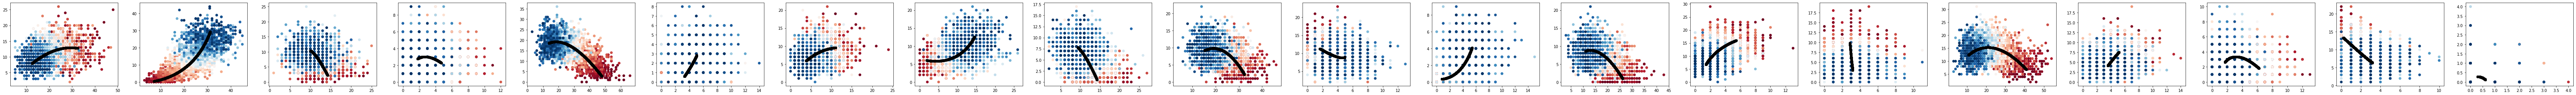

In [109]:
t = np.linspace(0,1,2000)
p = 20
fig, ax = plt.subplots(1,p,figsize=(6*p,4))
for i in range(p):
    #ax[i].plot(Y[:,i,1]*gamma[i],Y[:,i,1],'--', color='gray');
    ax[i].scatter(X[:,i,0],X[:,i,1],c=t);
    ax[i].scatter(Y[:,i,0],Y[:,i,1],c='black');
# time increases from blue to red

In [110]:
traj = Trajectory(topo, tau)
res = traj.fit_multi_init(X,100,n_init=3,epoch=10,parallel=True,n_threads=4)

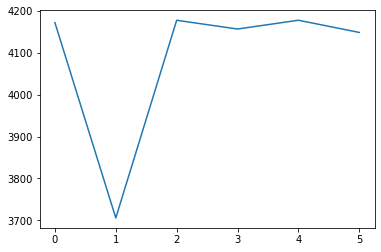

In [111]:
Q, elbos = res
plt.plot(elbos);

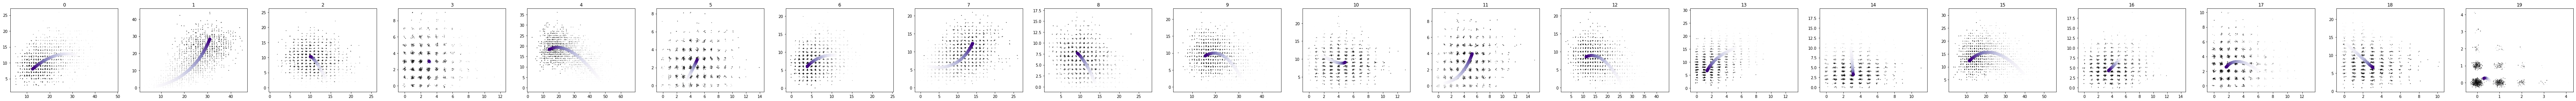

In [112]:
plot_phase(X,Q,traj,idx=np.arange(20))

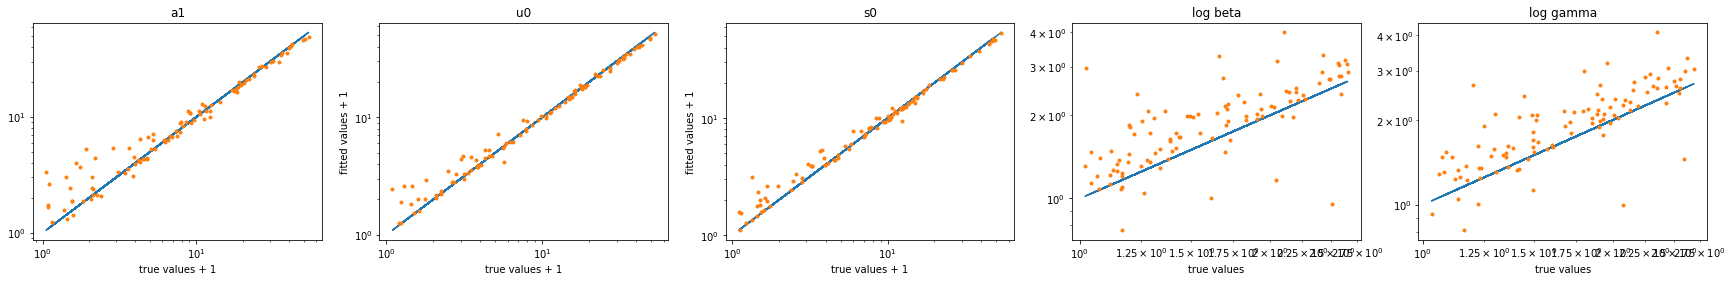

In [113]:
plot_theta(true_theta,traj.theta)

In [114]:
rho = np.linalg.norm(traj.theta-true_theta,axis=0)/np.linalg.norm(true_theta,axis=0)
rho

array([0.08382886, 0.04871034, 0.0491747 , 0.29773754, 0.25390978])

In [115]:
traj.theta[:,0]

array([ 4.43148625, 33.19959636,  9.61178162,  2.97794552,  2.68549399,
        5.30800734,  1.63018232, 15.50704365,  7.32553702, 10.28791224,
        5.04680507,  5.87512346,  5.6675762 ,  0.89375334,  3.17958762,
        4.29731178,  2.06156888,  0.97548007,  3.36530602,  0.2510023 ,
        8.43016995,  1.10960094,  2.58288981,  3.33723379,  1.4168339 ,
        1.41468334,  5.26167678,  3.43303926,  3.34762505, 39.9759662 ,
       19.76977744, 20.04279364, 11.79181991, 21.41917273, 25.93944536,
       45.89861466, 28.55877699,  0.8885915 , 26.37391194,  2.27982858,
        4.33508318,  4.29950498,  7.77989619,  8.99476312,  0.55861887,
       44.74619864,  6.16021643, 16.47320491, 12.49091074,  1.09036745,
        1.10196334, 17.05195104, 29.24820774,  3.37519712,  0.88082916,
       34.51785171,  3.26831089,  5.29629578,  2.00340282, 10.13939055,
       29.01076811, 22.27409638,  2.05709323, 41.29381574,  6.61409075,
        5.45176003,  5.74685012,  6.33802662, 47.41409175, 18.68

In [118]:
true_theta[:,0]

array([ 2.62635863, 34.2236664 ,  9.50975818,  0.660281  ,  0.76108991,
        5.49957141,  0.09337983, 17.3412638 ,  7.14718215,  7.84501497,
        5.20685401,  6.43102378,  3.84564616,  0.83168317,  3.23649714,
        0.91330253,  2.86550952,  1.05809156,  3.77873032,  0.15426015,
        8.57878731,  1.25757001,  2.60634631,  3.51081048,  1.08902067,
        0.51659385,  5.17106207,  1.19002305,  3.54633617, 40.3532915 ,
       19.91960288, 20.82601853,  9.87965083, 22.7249382 , 24.56929774,
       49.51390777, 33.43832538,  0.55247253, 25.54604345,  2.42377478,
        1.84718263,  4.06873604,  8.150338  , 11.20917445,  0.37131548,
       47.86953366,  4.18327535, 16.9342694 , 13.19969305,  1.39484548,
        1.11522888, 17.5259219 , 30.60403157,  3.7926818 ,  0.55400607,
       37.52055423,  3.17145005,  4.21761497,  1.08481172,  9.42343902,
       29.65255474, 22.5415593 ,  0.42201257, 40.76242597,  6.38861214,
        3.29418103,  5.92106223,  6.85402152, 52.44176641, 19.36

In [119]:
(np.abs(traj.theta-true_theta)/true_theta)[:,0]

array([6.87311930e-01, 2.99228618e-02, 1.07282900e-02, 3.51011848e+00,
       2.52848457e+00, 3.48325451e-02, 1.64575422e+01, 1.05772000e-01,
       2.49545726e-02, 3.11394852e-01, 3.07381277e-02, 8.64404080e-02,
       4.73764344e-01, 7.46319929e-02, 1.75836750e-02, 3.70524460e+00,
       2.80557659e-01, 7.80759444e-02, 1.09408257e-01, 6.27136431e-01,
       1.73238198e-02, 1.17662693e-01, 8.99976382e-03, 4.94406342e-02,
       3.01016546e-01, 1.73848270e+00, 1.75234233e-02, 1.88485106e+00,
       5.60327927e-02, 9.35054583e-03, 7.52150728e-03, 3.76079992e-02,
       1.93546221e-01, 5.74595826e-02, 5.57666579e-02, 7.30157095e-02,
       1.45926817e-01, 6.08390355e-01, 3.24069166e-02, 5.93892635e-02,
       1.34686225e+00, 5.67176003e-02, 4.54510978e-02, 1.97553472e-01,
       5.04431963e-01, 6.52468237e-02, 4.72582106e-01, 2.72267124e-02,
       5.36968785e-02, 2.18287997e-01, 1.18949042e-02, 2.70439901e-02,
       4.43021317e-02, 1.10076379e-01, 5.89926903e-01, 8.00282027e-02,
      

In [120]:
rho = np.mean(np.abs(traj.theta-true_theta)/true_theta,axis=0)
rho

array([1.03627171, 0.35427005, 0.27814436, 0.22758161, 0.19150491])

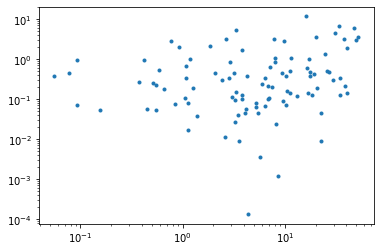

In [91]:
plt.loglog(true_theta[:,0], np.abs(traj.theta-true_theta)[:,0],'.');

In [18]:
traj = Trajectory(topo, tau, model="one_species")
res = traj.fit_multi_init(X.sum(axis=-1,keepdims=True),100,n_init=3,epoch=10,parallel=True,n_threads=2)

trial 1


100%|██████████| 10/10 [00:01<00:00,  8.86it/s]

trial 2



100%|██████████| 10/10 [00:00<00:00, 10.36it/s]
/home/mffang/workspace/Poisson-regression/RADOM/inference.py:395: RuntimeWarning: invalid value encountered in log
  config += np.exp( np.sum(np.log(np.arange(1,self.K+1)+theta_mean[self.topo[l]]))) * theta_mean[self.n_states]
100%|██████████| 10/10 [00:01<00:00,  8.99it/s]

trial 3



100%|██████████| 10/10 [00:01<00:00,  9.69it/s]


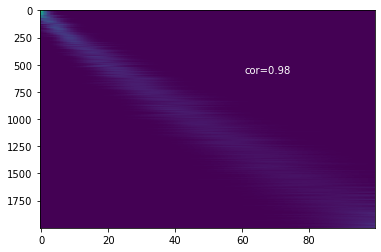

In [19]:
Q, elbos = res
plot_t(Q,t=t)

# Vary p, n and topo

In [222]:
def fit_vary_n(topo, tau, ns=[100,500,1000,2000,5000,10000], p=100, seeds = np.arange(20), n_init=3, cores=10):
    K = len(set(topo.flatten()))
    L = len(topo)
    results = []
    fig, axs = plt.subplots(len(ns), 10, figsize=(6*10,4*len(ns)))
    for i,n in enumerate(ns):   
        print(n)
        for k,seed in tqdm(enumerate(seeds)):
            theta, true_t, Y, X = simulate_data(topo,tau,n,p,random_seed=seed)
            traj = Trajectory(topo, tau)
            Q, elbos = traj.fit_multi_init(X,100,n_init=n_init,epoch=10,parallel=True,n_threads=cores)   
            results.append((theta, traj, Q, X))
            if k>=10:
                continue
            else:
                plot_t(Q, 0, ax=axs[i,k], t=true_t)
    return results

In [223]:
def fit_vary_p(topo, tau, n=2000, ps=[10,50,100,500,1000,2000], seeds = np.arange(20), n_init=3, cores=40):
    K = len(set(topo.flatten()))
    L = len(topo)
    results = []
    fig, axs = plt.subplots(len(ps), 10, figsize=(60,4*len(ps)) )
    for i,p in enumerate(ps): 
        print(p)
        for k,seed in tqdm(enumerate(seeds)):
            theta, true_t, Y, X = simulate_data(topo,tau,n,p,random_seed=seed)
            traj = Trajectory(topo, tau)
            Q, elbos = traj.fit_multi_init(X,100,n_init=n_init,epoch=10,parallel=True,n_threads=min(cores,max(2,int(p/50)))) 
            results.append((theta, traj, Q, X))
            if k>=10:
                continue
            else:
                plot_t(Q, 0, ax=axs[i,k], t=true_t)
    return results

In [41]:
def fit_vary_null_p(topo, tau, n=2000, true_p=100, null_ps=[10,50,100,200,500], seeds = np.arange(20), n_init=3, cores=40):
    K = len(set(topo.flatten()))
    L = len(topo)
    results = []
    fig, axs = plt.subplots(len(null_ps), 10, figsize=(60,4*len(null_ps)) )
    for i,null_p in enumerate(null_ps): 
        print(null_p)
        p=true_p+null_p
        for k,seed in enumerate(seeds):
            theta, true_t, Y, X = simulate_data_null(topo,tau,n,true_p,null_p,random_seed=seed)
            traj = Trajectory(topo, tau)
            Q, elbos = traj.fit_multi_init(X,100,n_init=n_init,epoch=10,parallel=True,n_threads=min(cores,max(2,int(p/50)))) 
            results.append((theta, traj, Q, X))
            if k>=10:
                continue
            else:
                plot_t(Q, 0, ax=axs[i,k], t=true_t)
    return results

## Topo 1: one lineage and one transition

### Vary n

100
500
1000
2000
5000
10000


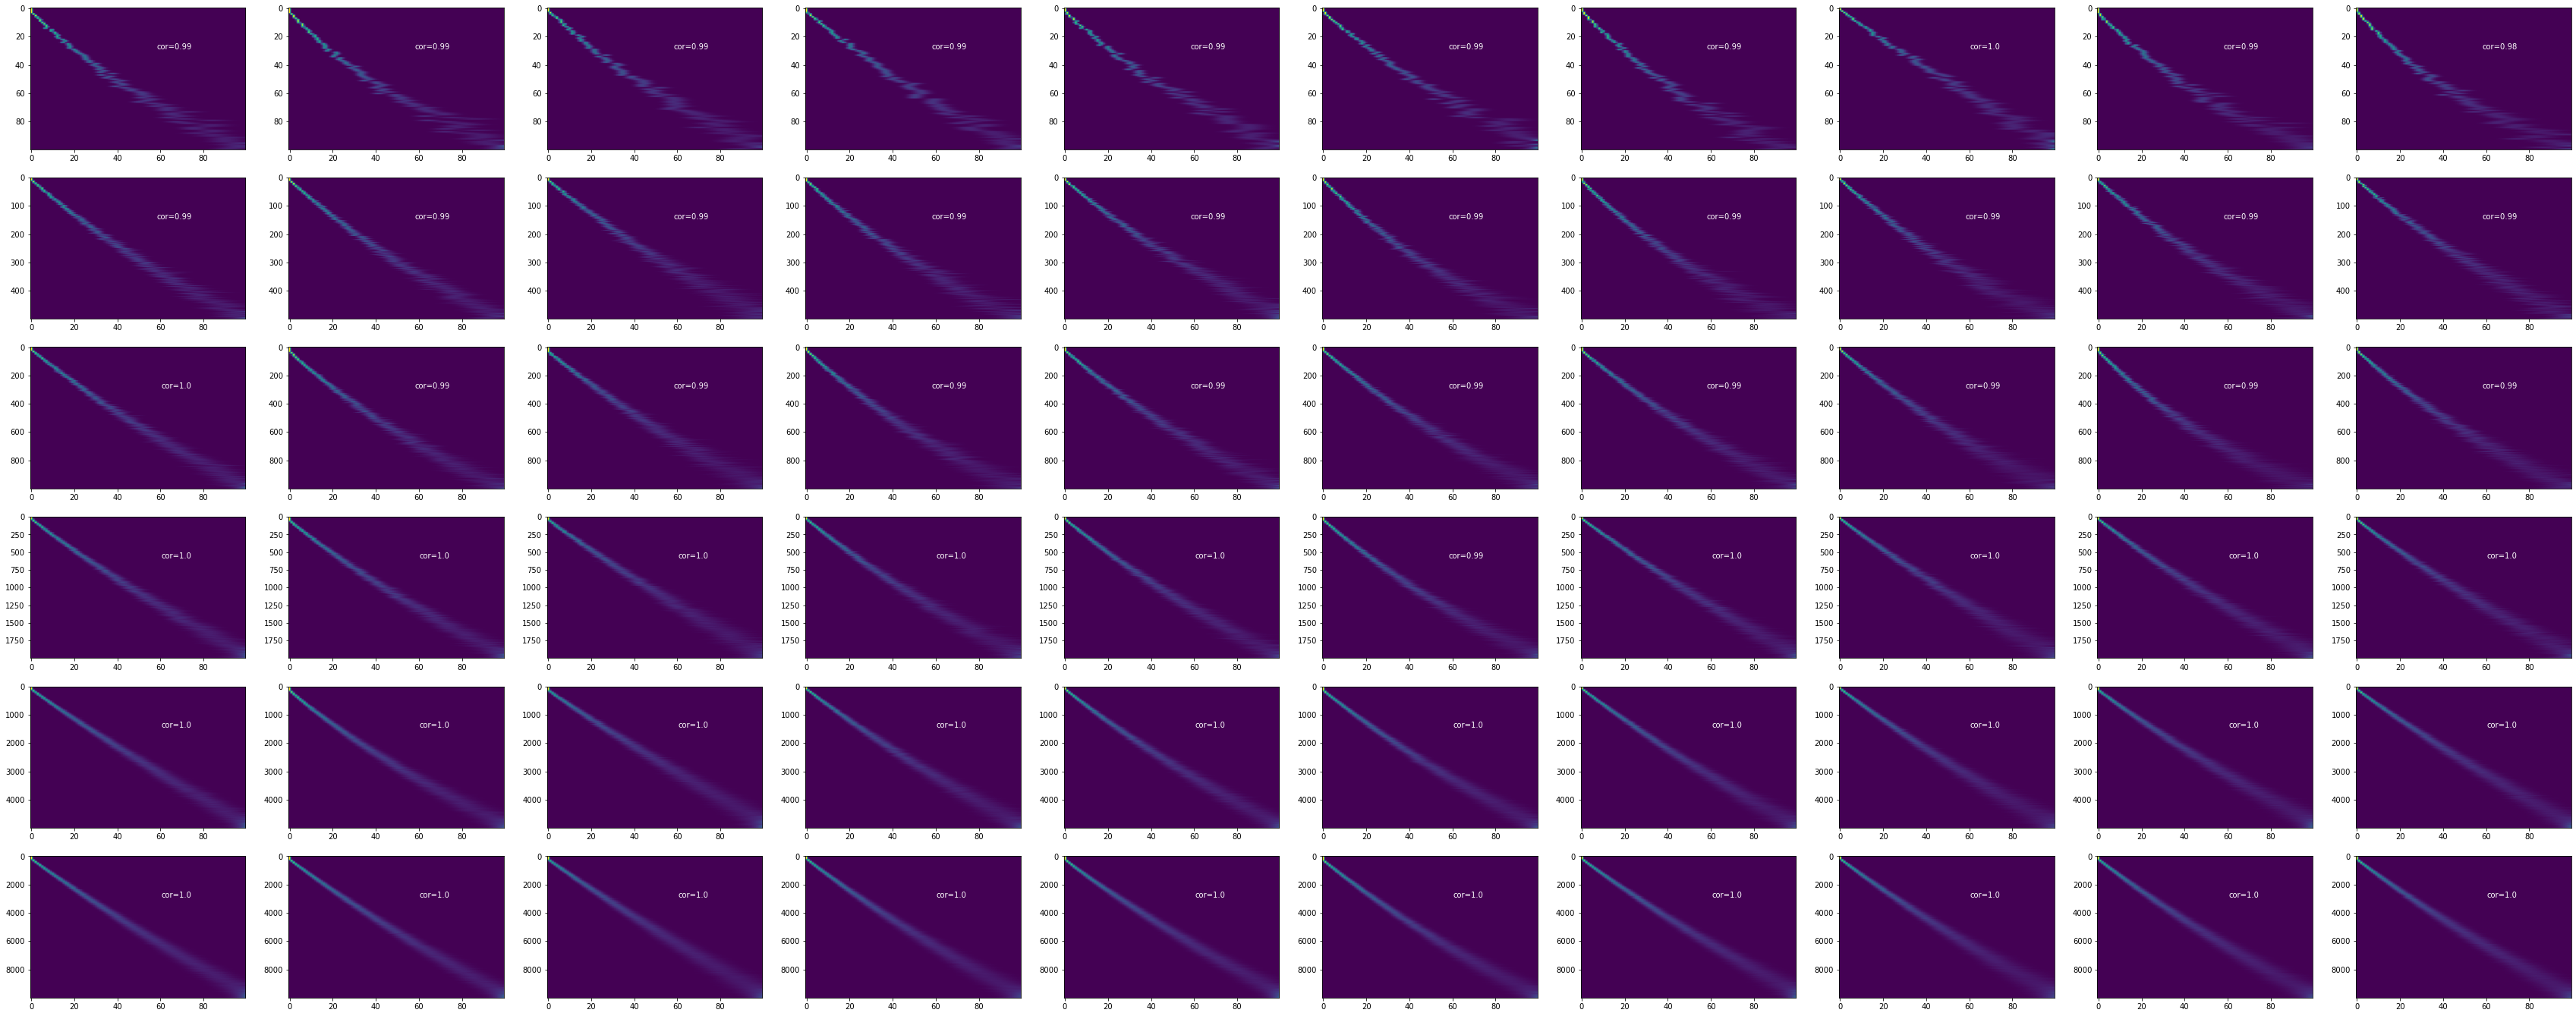

In [15]:
topo = np.array([[0,]])
tau = (0,1)
results = fit_vary_n(topo, tau)

In [16]:
with open('../figures/topo_1_vary_n.pickle', 'wb') as f:
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [183]:
with open('../figures/topo_1_vary_n.pickle', 'rb') as f:
    results = pickle.load(f)

In [184]:
rho = np.zeros((len(results),5))
for i in range(len(results)):
    true_theta, traj, Q, X = results[i]
    #rho[i]=np.linalg.norm(traj.theta-true_theta,axis=0)/np.linalg.norm(true_theta,axis=0)
    rho[i]=np.mean(np.abs(traj.theta-true_theta),axis=0)

In [185]:
np.argmax(rho)

20

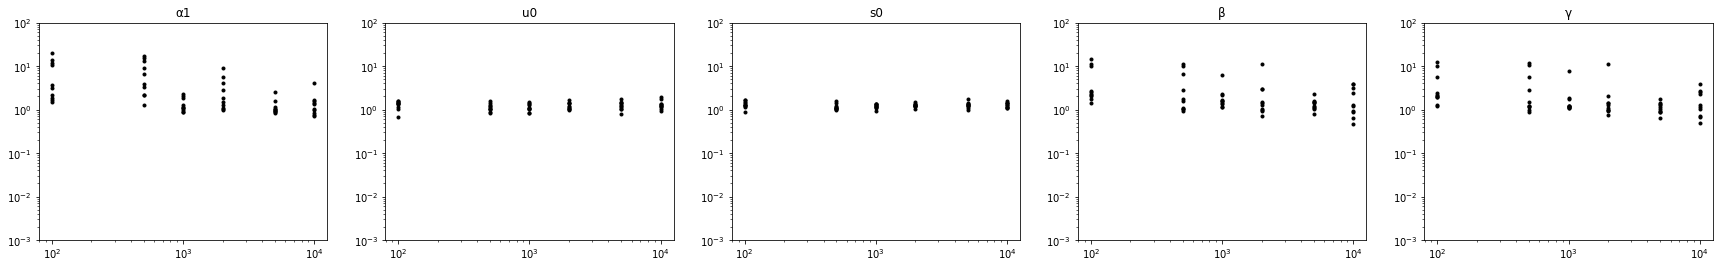

In [186]:
fig, ax = plt.subplots(1,5,figsize=(5*6,4))
for i,p in enumerate([100,500,1000,2000,5000,10000]):
    for k in range(10):
        for j in range(5):
            ax[j].loglog(p,rho[i*10+k][j],'k.');
            
ax[0].set_title("α1")
ax[1].set_title("u0")
ax[2].set_title("s0")
ax[3].set_title("β")
ax[4].set_title("γ")
plt.setp(ax, ylim=(0.001,100));

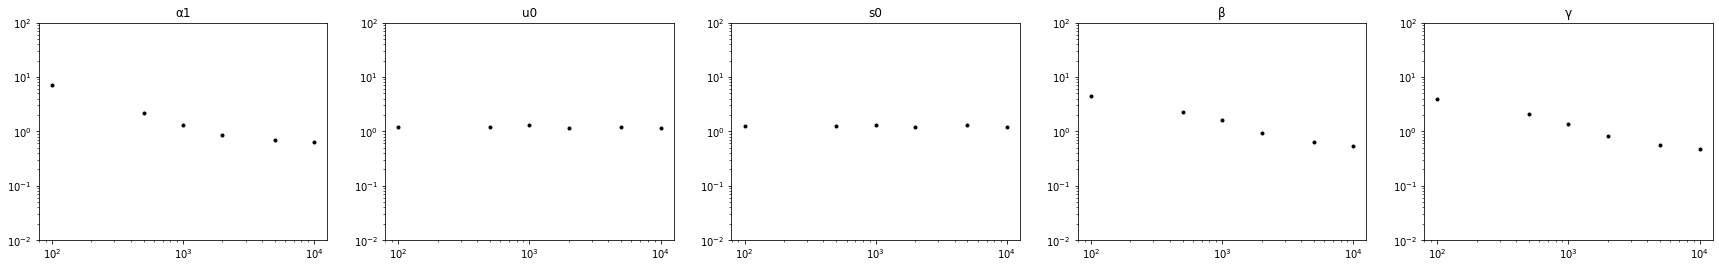

In [187]:
fig, ax = plt.subplots(1,5,figsize=(5*6,4))
for i,p in enumerate([100,500,1000,2000,5000,10000]):
    for j in range(5):
        ax[j].loglog(p,np.mean(rho[i*20:(i+1)*20,j]),'k.')
        
ax[0].set_title("α1")
ax[1].set_title("u0")
ax[2].set_title("s0")
ax[3].set_title("β")
ax[4].set_title("γ")
plt.setp(ax, ylim=(0.01,100));
plt.savefig("../figures/topo_1_vary_n.png")

### Vary p

10
50
100
500
1000
2000


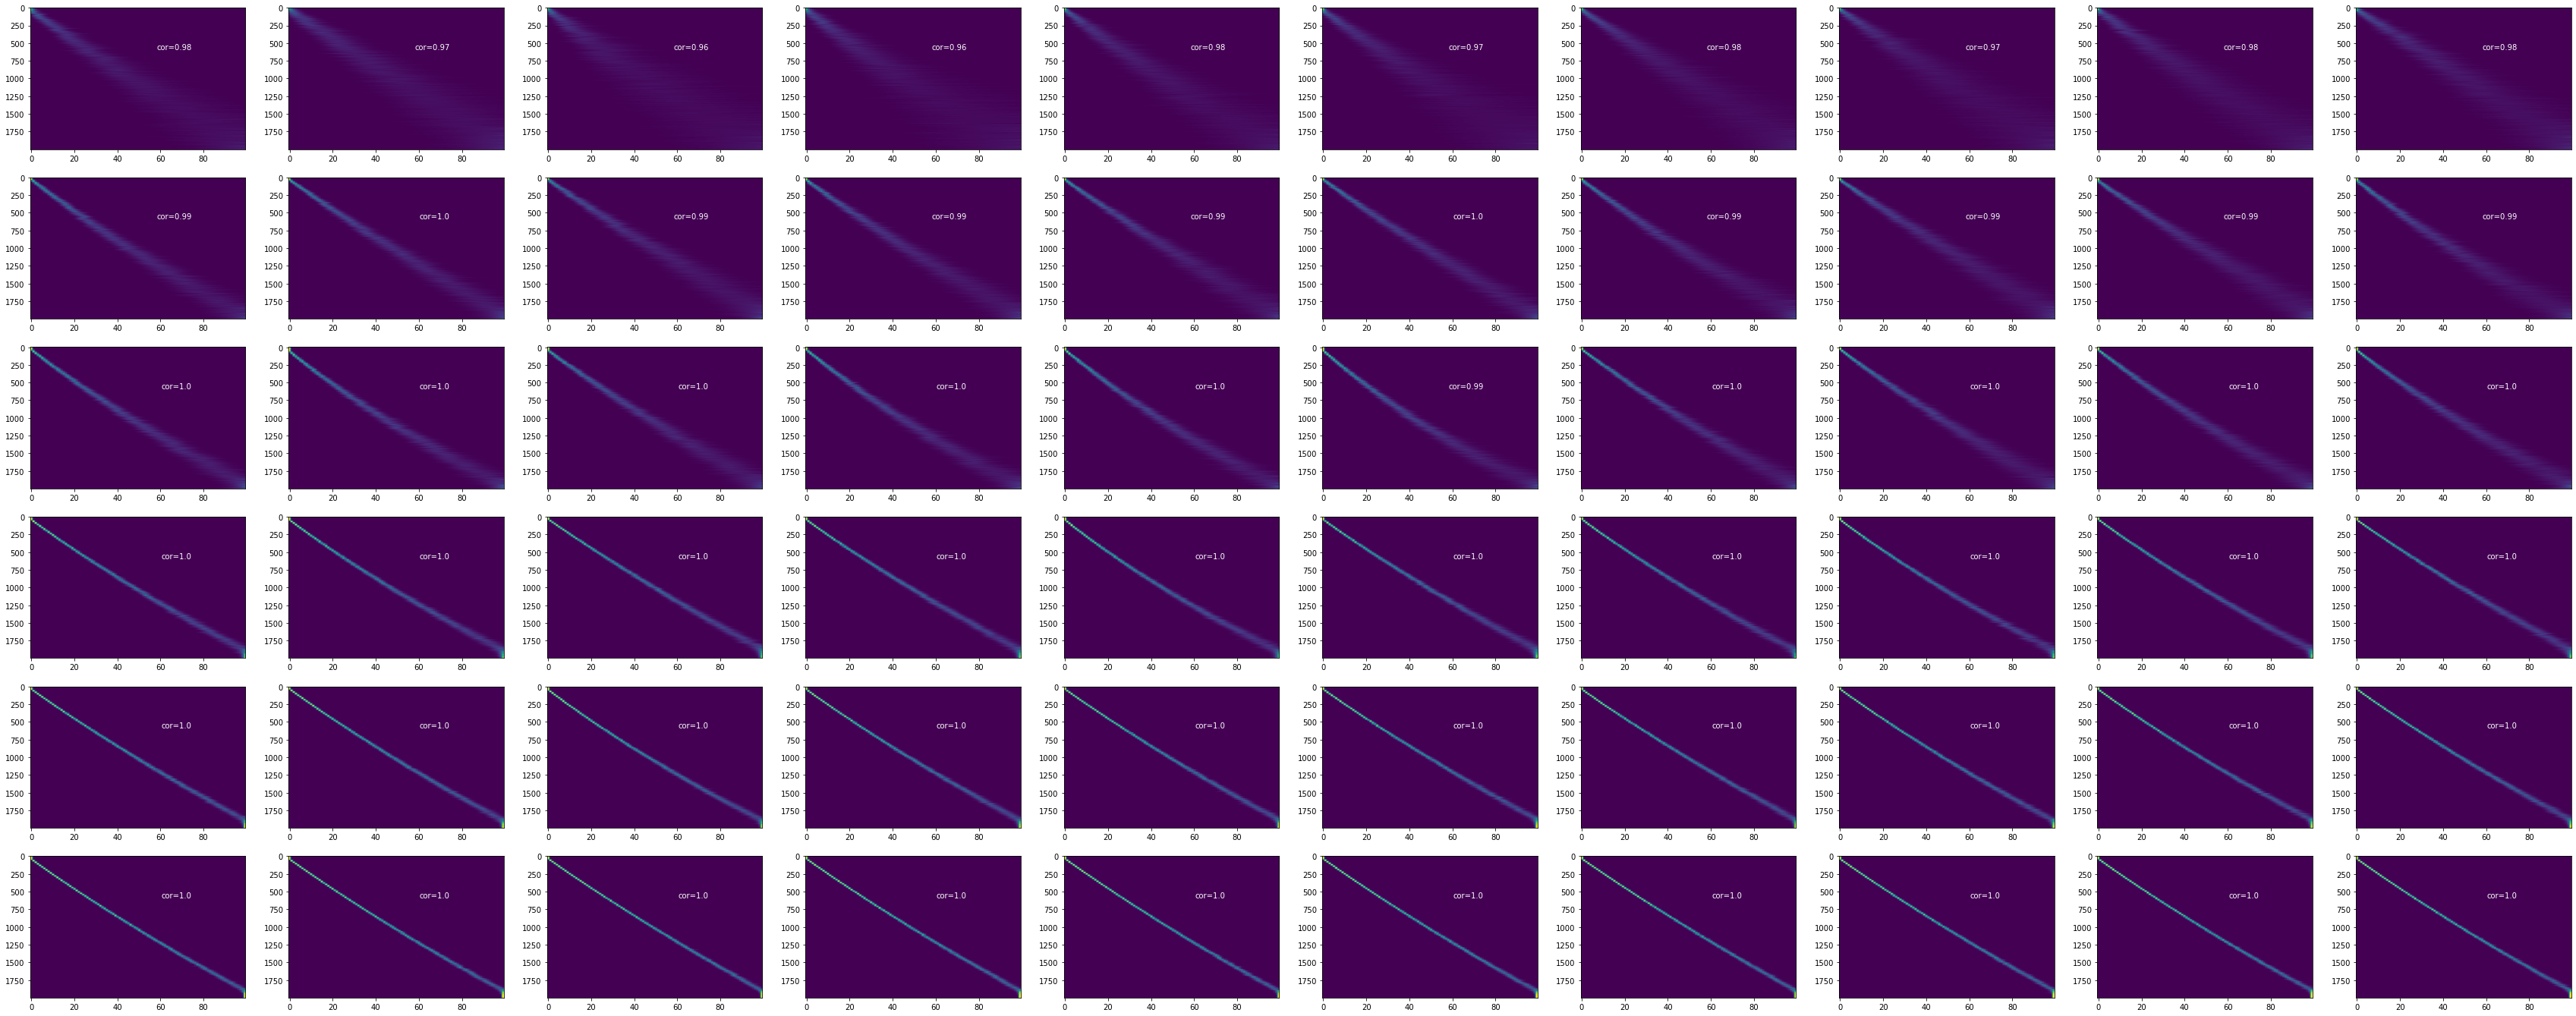

In [27]:
topo = np.array([[0,]])
tau = (0,1)
results = fit_vary_p(topo, tau)

In [28]:
with open('../figures/topo_1_vary_p.pickle', 'wb') as f:
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [198]:
with open('../figures/topo_1_vary_p.pickle', 'rb') as f:
    results = pickle.load(f)

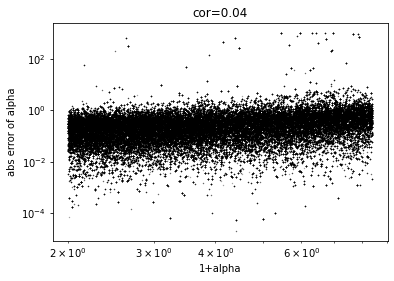

In [205]:
fig, ax = plt.subplots()
x=np.array([])
y=np.array([])
for i in range(80,100):
    theta, traj = results[i][:2]
    x=np.append(x,1+theta[:,-1])
    y=np.append(y,np.abs(theta-traj.theta)[:,-1])
    ax.scatter(x,y,color='k',s=0.1,alpha=0.5);
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('1+alpha')
ax.set_ylabel('abs error of alpha')
ax.set_title("cor="+str(np.around(np.corrcoef(x,y)[0,1],2)));

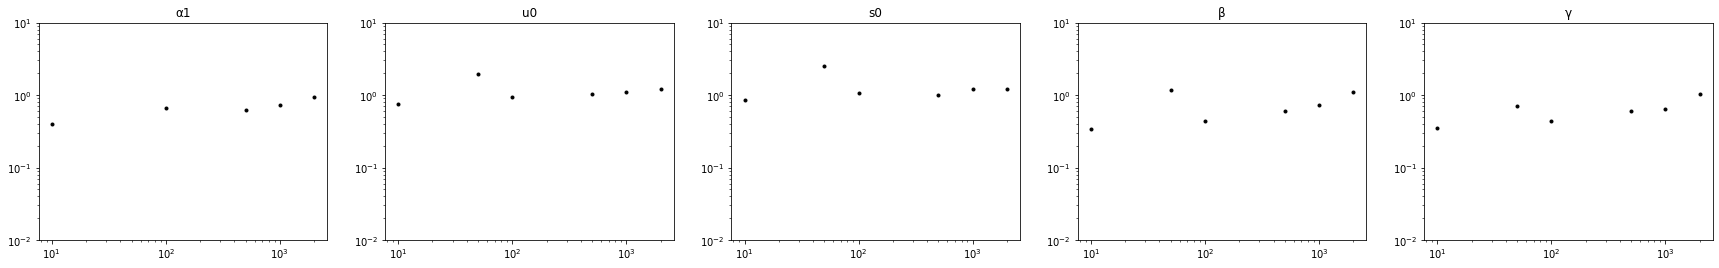

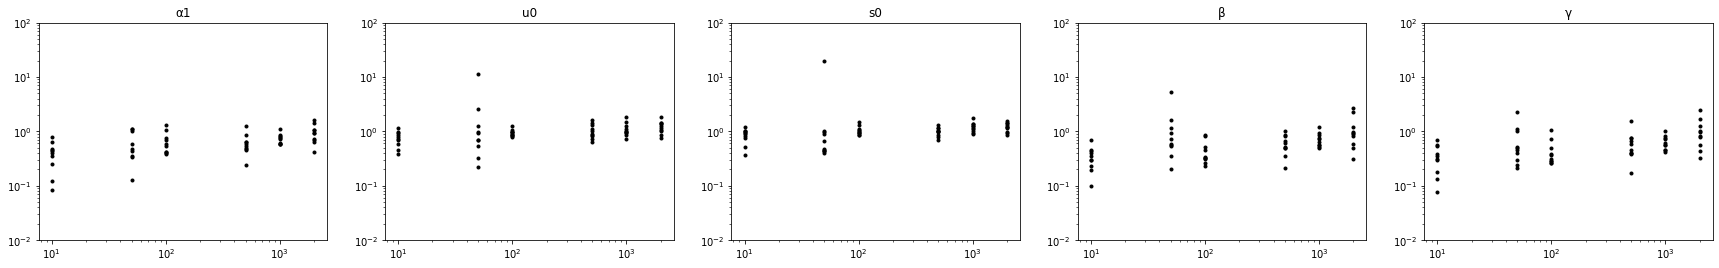

In [189]:
rho = np.zeros((len(results),5))
for i in range(len(results)):
    true_theta, traj, Q, X = results[i]
    #rho.append(np.linalg.norm(traj.theta-true_theta,axis=0)/np.linalg.norm(true_theta,axis=0))
    rho[i]=np.mean(np.abs(traj.theta-true_theta),axis=0)
    
fig, ax = plt.subplots(1,5,figsize=(5*6,4))
for i,p in enumerate([10,50,100,500,1000,2000]):
    for j in range(5):
        s = 0
        for k in range(10):
            s += rho[i*10+k][j]
        ax[j].loglog(p,s/10,'k.')
        
ax[0].set_title("α1")
ax[1].set_title("u0")
ax[2].set_title("s0")
ax[3].set_title("β")
ax[4].set_title("γ")
plt.setp(ax, ylim=(0.01,10));
plt.savefig("../figures/topo_1_vary_p.png")

fig, ax = plt.subplots(1,5,figsize=(5*6,4))
for i,p in enumerate([10,50,100,500,1000,2000]):
    for k in range(10):
        for j in range(5):
            ax[j].loglog(p,rho[i*10+k][j],'k.');
            
ax[0].set_title("α1")
ax[1].set_title("u0")
ax[2].set_title("s0")
ax[3].set_title("β")
ax[4].set_title("γ")
plt.setp(ax, ylim=(0.01,100));

## Vary null gene numbers

10
50
100
200
500


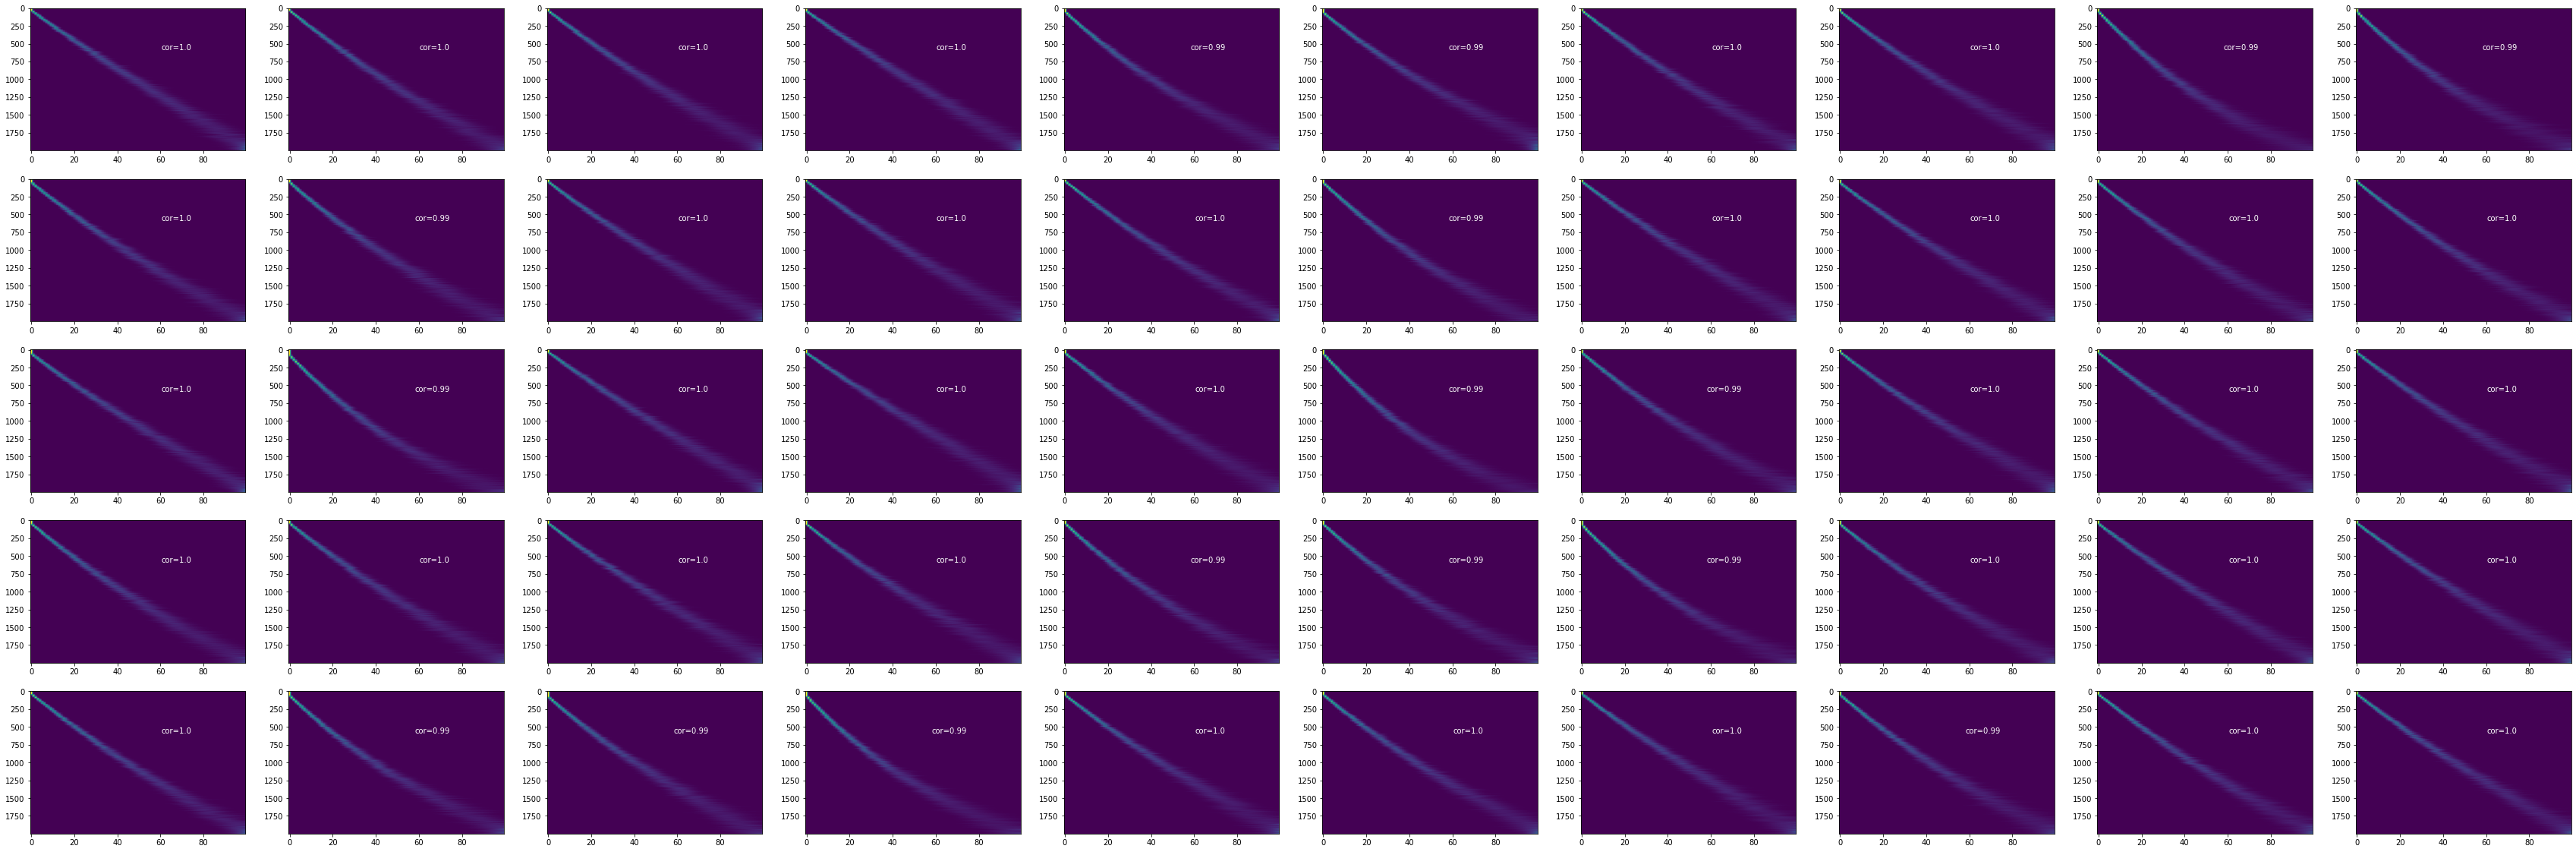

In [42]:
topo = np.array([[0,]])
tau = (0,1)
results = fit_vary_null_p(topo, tau)

In [43]:
with open('../figures/topo_1_vary_null_p.pickle', 'wb') as f:
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [190]:
with open('../figures/topo_1_vary_null_p.pickle', 'rb') as f:
    results =pickle.load(f)

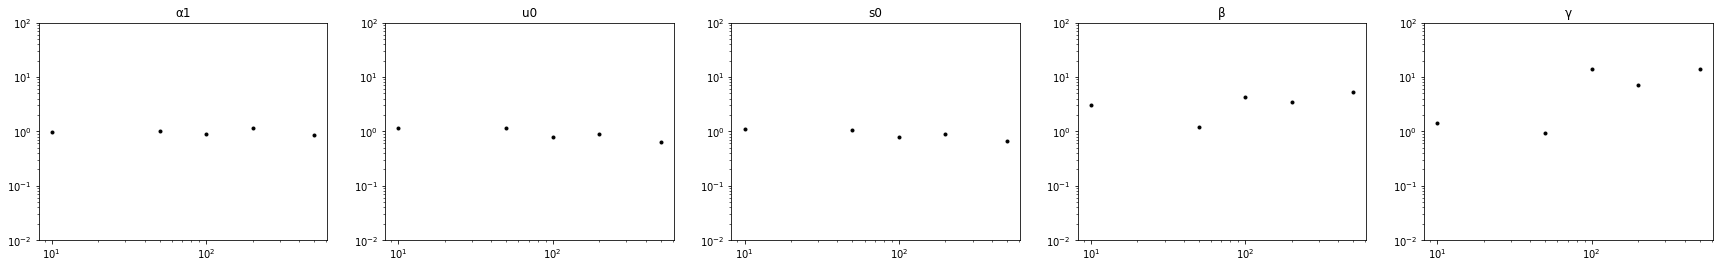

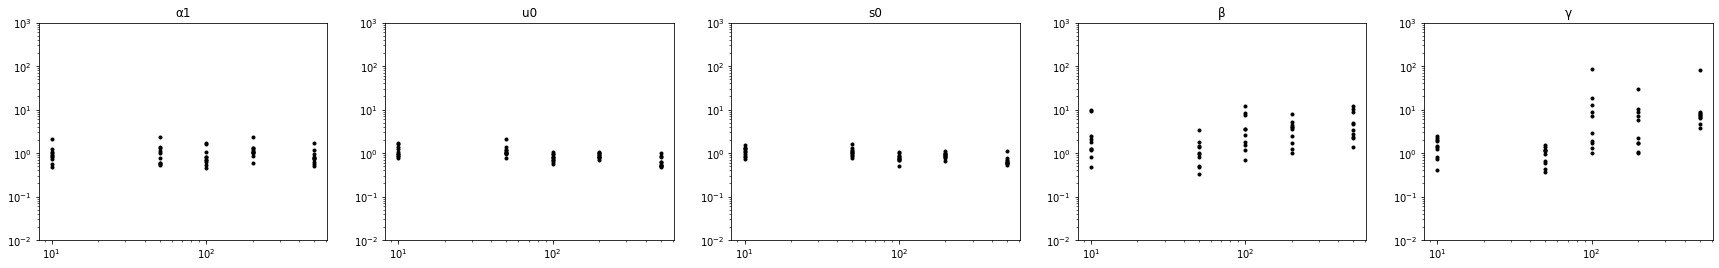

In [191]:
rho = []
true_p = 100
for i in range(len(results)):
    true_theta, traj, Q, X = results[i]
    #rho.append(np.linalg.norm(traj.theta[:true_p]-true_theta[:true_p],axis=0)/np.linalg.norm(true_theta[:true_p],axis=0))
    rho.append(np.mean(np.abs(traj.theta-true_theta),axis=0))
fig, ax = plt.subplots(1,5,figsize=(5*6,4))
for i,p in enumerate([10,50,100,200,500]):
    for j in range(5):
        s = 0
        for k in range(10):
            s += rho[i*10+k][j]
        ax[j].loglog(p,s/10,'k.')
        
ax[0].set_title("α1")
ax[1].set_title("u0")
ax[2].set_title("s0")
ax[3].set_title("β")
ax[4].set_title("γ")
plt.setp(ax, ylim=(0.01,100));
plt.savefig("../figures/topo_1_vary_null_p.png")

fig, ax = plt.subplots(1,5,figsize=(5*6,4))
for i,p in enumerate([10,50,100,200,500]):
    for k in range(10):
        for j in range(5):
            ax[j].loglog(p,rho[i*10+k][j],'k.');
            
ax[0].set_title("α1")
ax[1].set_title("u0")
ax[2].set_title("s0")
ax[3].set_title("β")
ax[4].set_title("γ")
plt.setp(ax, ylim=(0.01,1000));

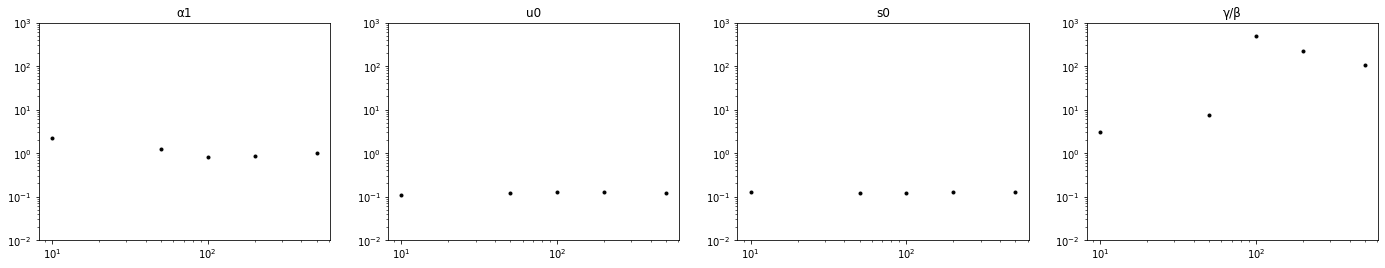

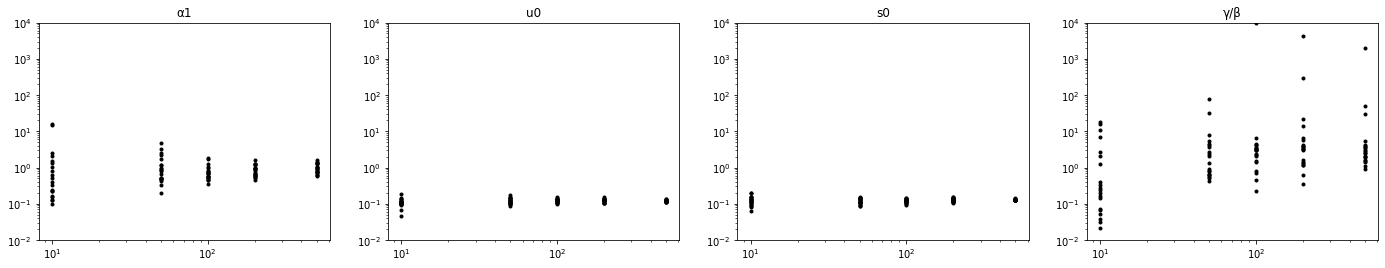

In [196]:
rho = np.zeros((len(results),4))
true_p = 100
K=20

for i in range(len(results)):
    true_theta, traj, Q, X = results[i]
    #rho[i,:3] = (np.linalg.norm(traj.theta[true_p:]-true_theta[true_p:],axis=0)/np.linalg.norm(true_theta[true_p:],axis=0))[:3]
    #rho[i,3] = np.linalg.norm(traj.theta[true_p:,-1]/traj.theta[true_p:,-2]-true_theta[true_p:,-1])/np.linalg.norm(true_theta[true_p:,-1])
    rho[i,:3] = np.mean(np.abs(traj.theta[true_p:]-true_theta[true_p:]),axis=0)[:3]
    rho[i,3] = np.mean(np.abs(traj.theta[true_p:,-1]/traj.theta[true_p:,-2]-true_theta[true_p:,-1]))
    
fig, ax = plt.subplots(1,4,figsize=(4*6,4))
for i,p in enumerate([10,50,100,200,500]):
    for j in range(4):
        s = 0
        for k in range(K):
            s += rho[i*K+k][j]
        ax[j].loglog(p,s/K,'k.')
        
ax[0].set_title("α1")
ax[1].set_title("u0")
ax[2].set_title("s0")
ax[3].set_title("γ/β")

plt.setp(ax, ylim=(0.01,1000));

fig, ax = plt.subplots(1,4,figsize=(4*6,4))
for i,p in enumerate([10,50,100,200,500]):
    for k in range(K):
        for j in range(4):
            ax[j].loglog(p,rho[i*K+k][j],'k.');
            
ax[0].set_title("α1")
ax[1].set_title("u0")
ax[2].set_title("s0")
ax[3].set_title("γ/β")

plt.setp(ax, ylim=(0.01,10000));

## Topo 2: one lineage with two transitions

In [ ]:
topo = np.array([[0,1]])
tau = (0,1,2)
results = fit_vary_n(topo, tau, ns = [100,300,1000,3000,10000],seeds=np.arange(100))

with open('../figures/topo_2_vary_n.pickle', 'wb') as f:
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

100


13it [42:12, 194.87s/it]

In [206]:
with open('../figures/topo_2_vary_n.pickle', 'rb') as f:
    results = pickle.load(f)

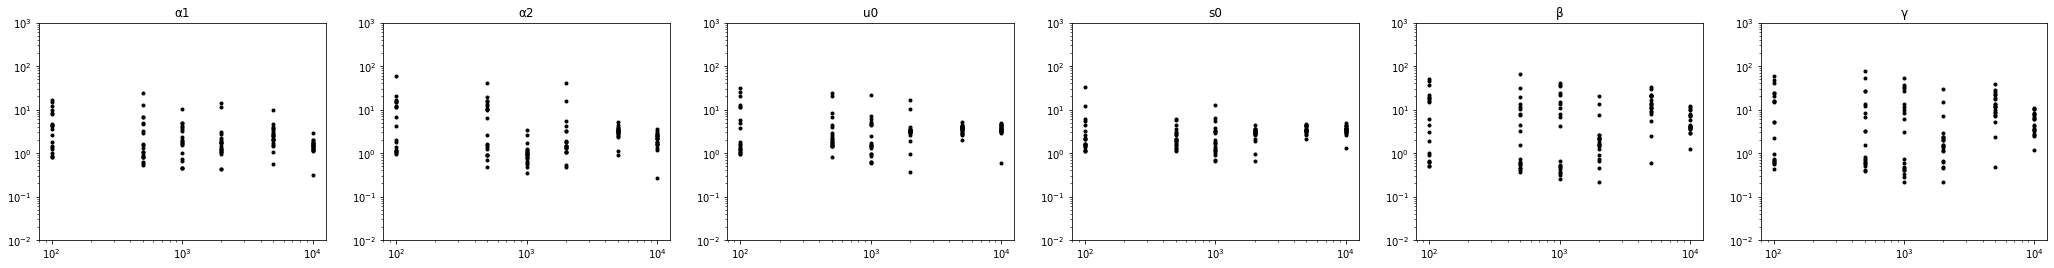

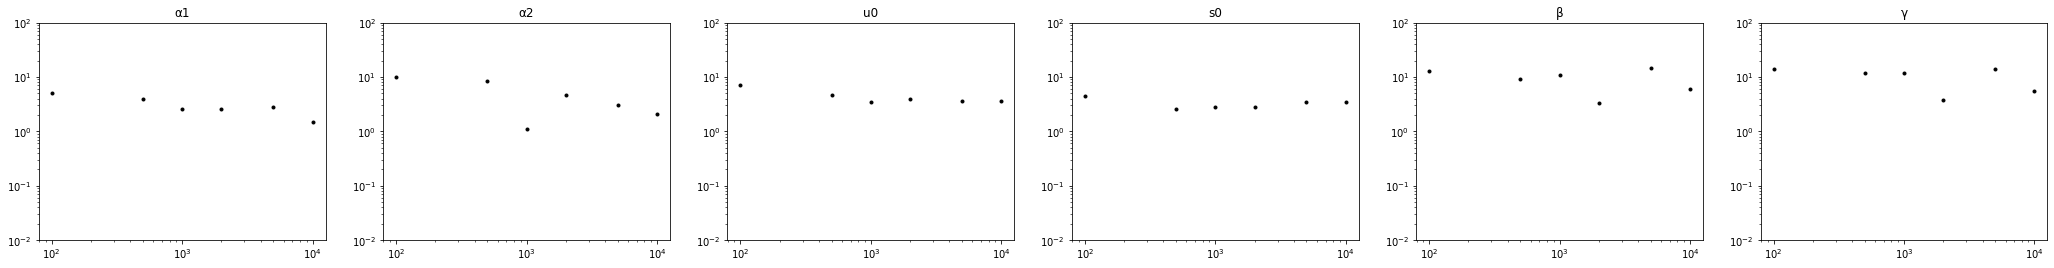

In [207]:
n_theta = 6
K = 20
ns = [100,500,1000,2000,5000,10000]
assert len(ns)*K == len(results)

rho = np.zeros((len(results),n_theta))
for i in range(len(results)):
    true_theta, traj, Q, X = results[i]
    #rho[i]=np.linalg.norm(traj.theta-true_theta,axis=0)/np.linalg.norm(true_theta,axis=0)
    rho[i]=np.mean(np.abs(traj.theta-true_theta),axis=0)
    
fig, ax = plt.subplots(1,n_theta,figsize=(6*n_theta,4))
for i,n in enumerate(ns):
    for j in range(n_theta):
        for k in range(K):    
            ax[j].loglog(n,rho[i*K+k,j],'k.');
            
ax[0].set_title("α1")
ax[1].set_title("α2")
ax[-4].set_title("u0")
ax[-3].set_title("s0")
ax[-2].set_title("β")
ax[-1].set_title("γ")
plt.setp(ax, ylim=(0.01,1000));

fig, ax = plt.subplots(1,n_theta,figsize=(n_theta*6,4))
for i,n in enumerate(ns):
    for j in range(n_theta):
        ax[j].loglog(n,np.mean(rho[i*K:(i+1)*K,j]),'k.')
        
ax[0].set_title("α1")
ax[1].set_title("α2")
ax[-4].set_title("u0")
ax[-3].set_title("s0")
ax[-2].set_title("β")
ax[-1].set_title("γ")
plt.setp(ax, ylim=(0.01,100));
plt.savefig("../figures/topo_2_vary_n.png")

10
50
100
500
1000
2000


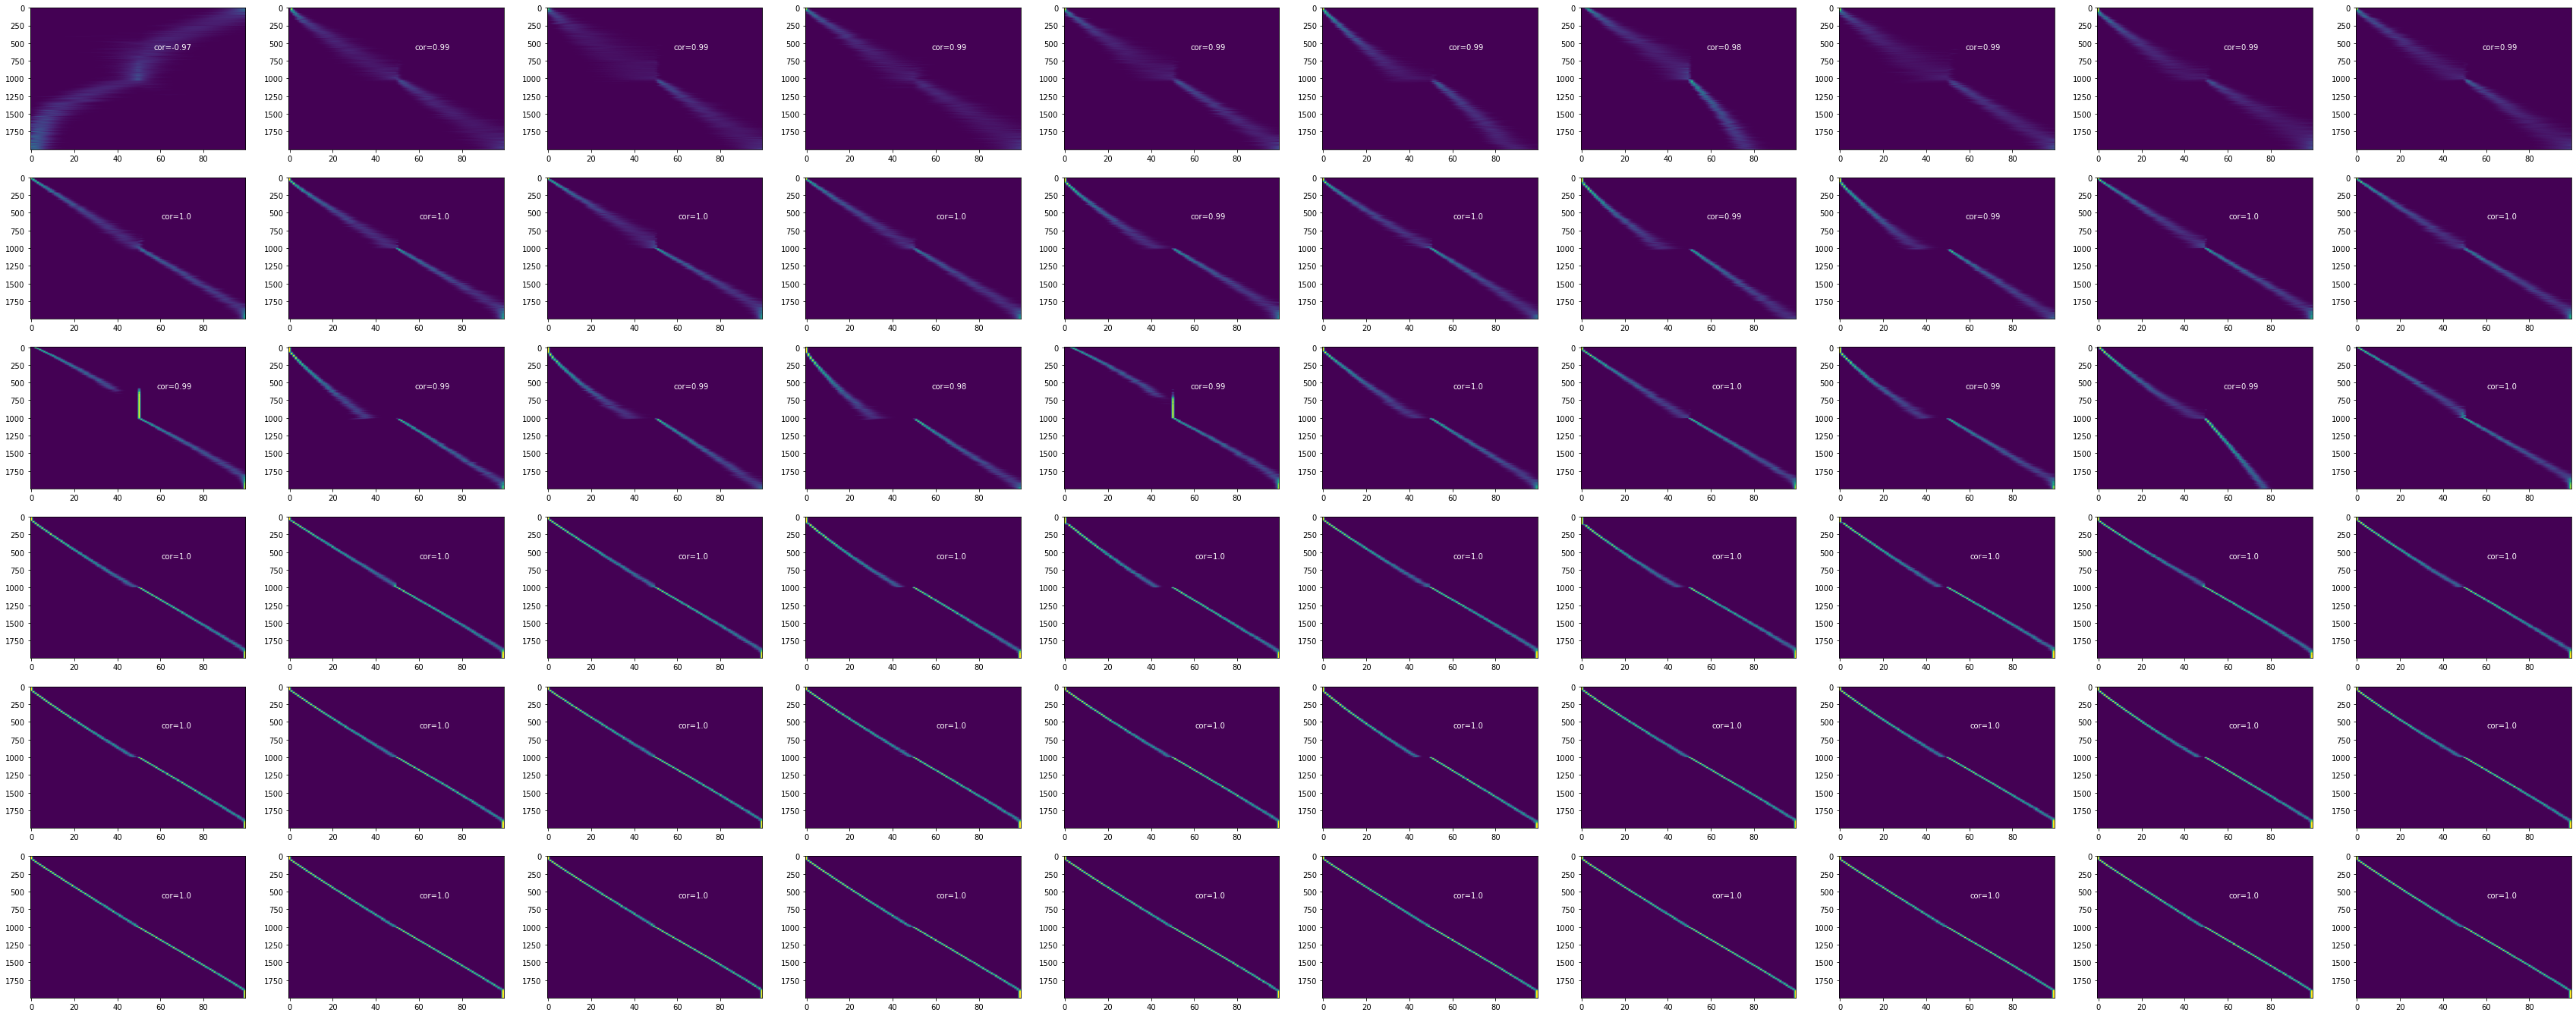

In [56]:
topo = np.array([[0,1]])
tau = (0,1,2)
results = fit_vary_p(topo, tau)

In [57]:
with open('../figures/topo_2_vary_p.pickle', 'wb') as f:
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

In [208]:
with open('../figures/topo_2_vary_p.pickle', 'rb') as f:
    results = pickle.load(f)

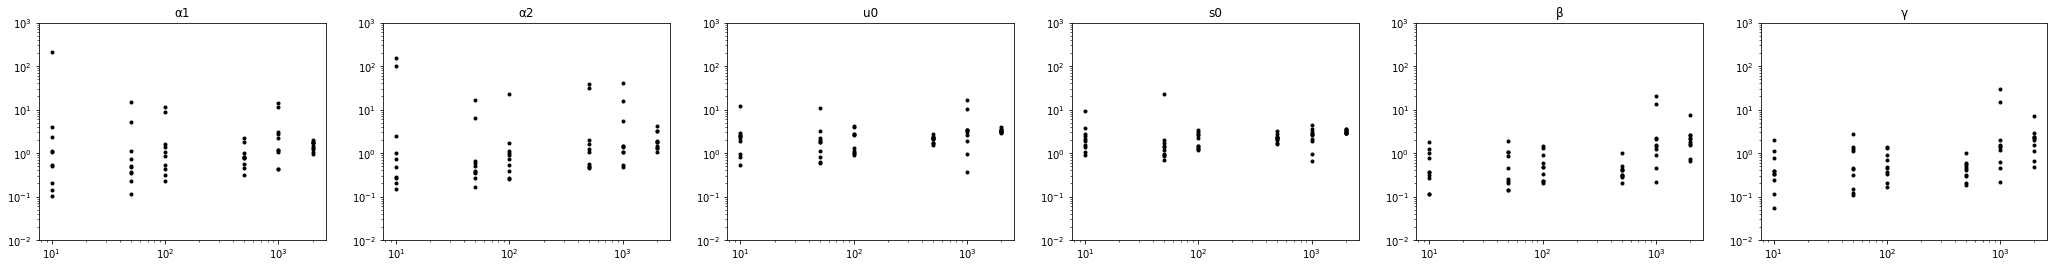

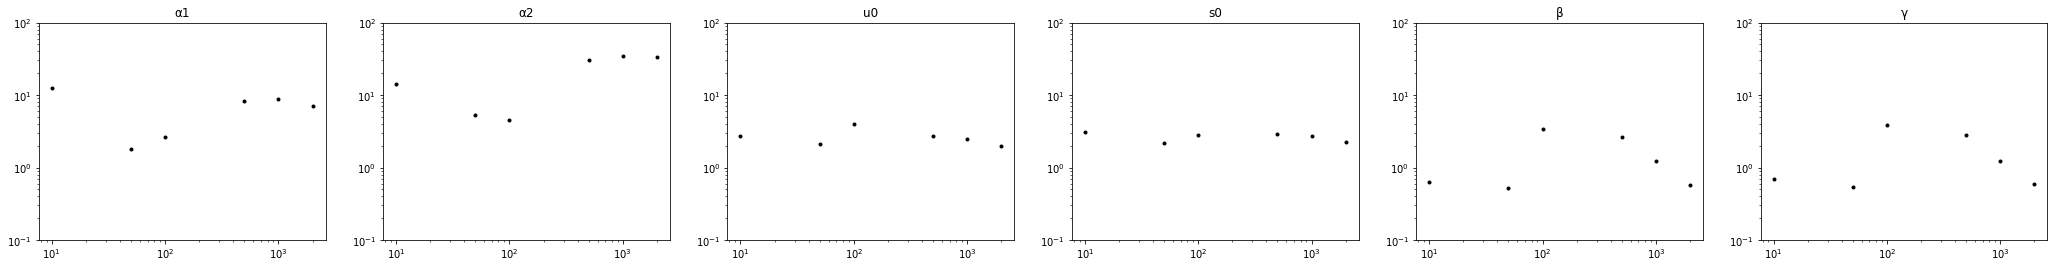

In [211]:
n_theta = 6
rho = np.zeros((len(results),n_theta))
for i in range(len(results)):
    true_theta, traj, Q, X = results[i]
    #rho[i]=np.linalg.norm(traj.theta-true_theta,axis=0)/np.linalg.norm(true_theta,axis=0)
    rho[i]=np.mean(np.abs(traj.theta-true_theta),axis=0)
    
fig, ax = plt.subplots(1,n_theta,figsize=(6*n_theta,4))
for i,p in enumerate([10,50,100,500,1000,2000]):
    for k in range(10):
        for j in range(n_theta):
            ax[j].loglog(p,rho[i*10+k][j],'k.');
            
ax[0].set_title("α1")
ax[1].set_title("α2")
ax[-4].set_title("u0")
ax[-3].set_title("s0")
ax[-2].set_title("β")
ax[-1].set_title("γ")
plt.setp(ax, ylim=(0.01,1000));

fig, ax = plt.subplots(1,n_theta,figsize=(n_theta*6,4))
for i,p in enumerate([10,50,100,500,1000,2000]):
    for j in range(n_theta):
        ax[j].loglog(p,np.mean(rho[i*20:(i+1)*20,j]),'k.')
        
ax[0].set_title("α1")
ax[1].set_title("α2")
ax[-4].set_title("u0")
ax[-3].set_title("s0")
ax[-2].set_title("β")
ax[-1].set_title("γ")
plt.setp(ax, ylim=(0.1,100));
plt.savefig("../figures/topo_2_vary_p.png")

## Topo 3 : two lineages (bifurcation)

100
500
1000
2000
5000
10000


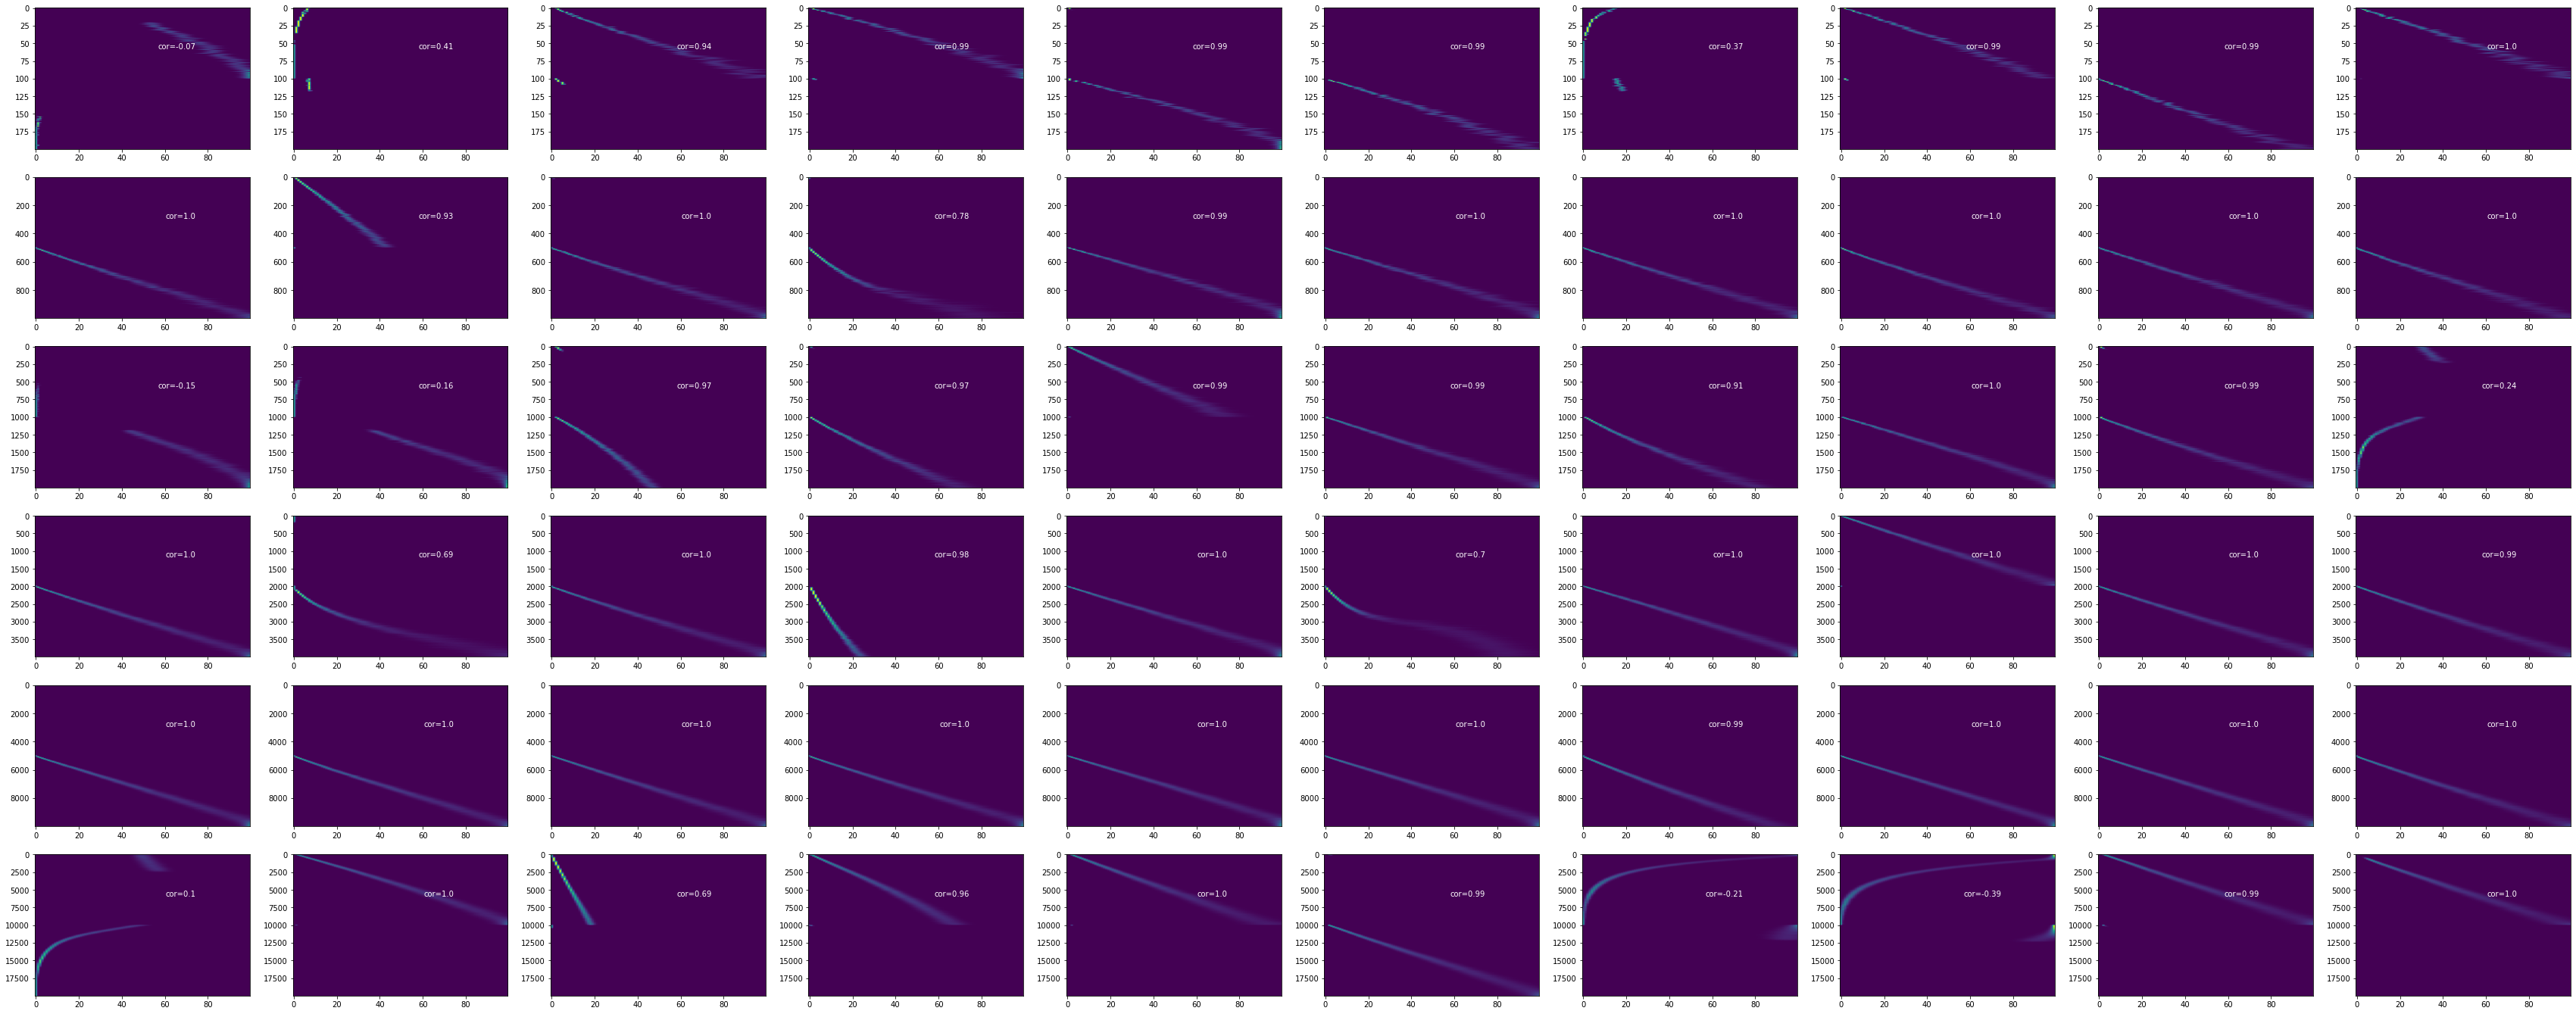

In [67]:
topo = np.array([[0],[1]])
tau = (0,1)
results = fit_vary_n(topo, tau)

with open('../figures/topo_3_vary_n.pickle', 'wb') as f:
    pickle.dump(results, f, pickle.HIGHEST_PROTOCOL)

trial 1


100%|██████████| 10/10 [00:49<00:00,  4.90s/it]

trial 2



100%|██████████| 10/10 [00:41<00:00,  4.18s/it]

trial 3



100%|██████████| 10/10 [00:41<00:00,  4.14s/it]


trial 1


100%|██████████| 10/10 [01:30<00:00,  9.02s/it]

trial 2



100%|██████████| 10/10 [01:07<00:00,  6.73s/it]

trial 3



100%|██████████| 10/10 [01:19<00:00,  7.95s/it]


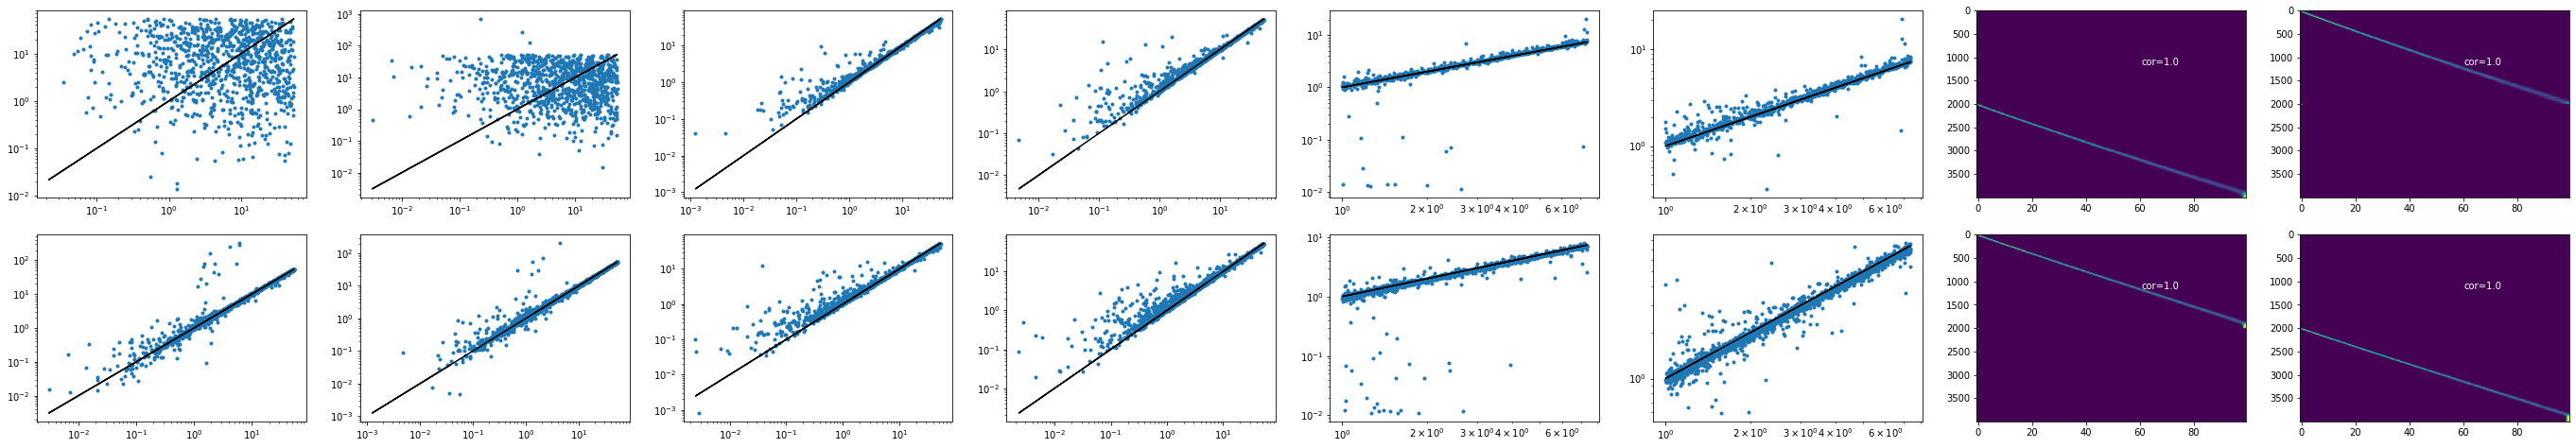

In [17]:
topo = np.array([[0],[1]])
tau = (0,1)
plot_fit_result(topo, tau, n=2000, rs=[0.5,1], n_init=3, cores=20)

# Model selection

## null genes

In [18]:
import numpy as np

def simulate_data_with_null(topo, tau, n, p, null = 0.5, loga_max=4, logb_max=2, random_seed=42):
    np.random.seed(random_seed)
    L=len(topo)
    n_states=len(set(topo.flatten()))
    t=np.linspace(tau[0],tau[-1],n)
    true_t = []
    
    theta=np.zeros((p,n_states+4))
    for j in range(n_states+2):
        theta[:,j]=np.exp(np.random.uniform(0,loga_max,size=p))-1
    theta[:,-2]=np.exp(np.random.uniform(0,logb_max,size=p))
    theta[:,-1]=np.exp(np.random.uniform(0,logb_max,size=p))

    null_p = int(p*null)
    theta[:null_p,1]=theta[:null_p,0]
    theta[:null_p,-4]=theta[:null_p,0]
    theta[:null_p,-2]=1
    theta[:null_p,-1]=theta[:null_p,-4]/theta[:null_p,-3]

    Y = np.zeros((n*L,p,2))
    for l in range(L):
        theta_l = np.concatenate((theta[:,topo[l]], theta[:,-4:]), axis=1)
        Y[l*n:(l+1)*n] = get_Y(theta_l,t,tau) # m*p*2
        true_t = np.append(true_t,t)

    X = np.random.poisson(Y)
    return theta, true_t, Y, X

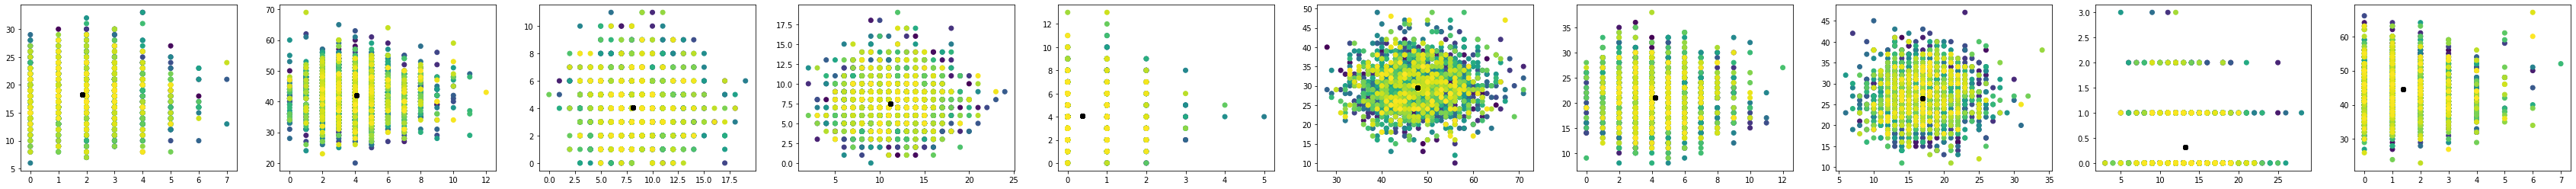

In [21]:
#%% generate data
topo = np.array([[0]])
tau = (0,1)
true_theta, t, Y, X = simulate_data_with_null(topo,tau,n=2000,p=200,random_seed=2023)

t = np.linspace(0,1,2000)
plot_p = 10
fig, ax = plt.subplots(1,plot_p,figsize=(6*plot_p,4))
for i in range(plot_p):
    j = 90 + i
    ax[i].scatter(X[:,j,0],X[:,j,1],c=t);
    ax[i].scatter(Y[:,j,0],Y[:,j,1],c='black');


In [20]:
traj = Trajectory(topo, tau)
res = traj.fit_multi_init(X,100,n_init=2,epoch=10,parallel=True,n_threads=2)

trial 1


100%|██████████| 10/10 [00:20<00:00,  2.08s/it]

trial 2



100%|██████████| 10/10 [00:17<00:00,  1.73s/it]


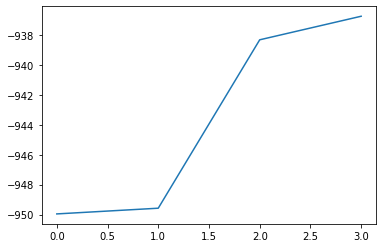

In [22]:
Q, elbos = res
plt.plot(elbos);

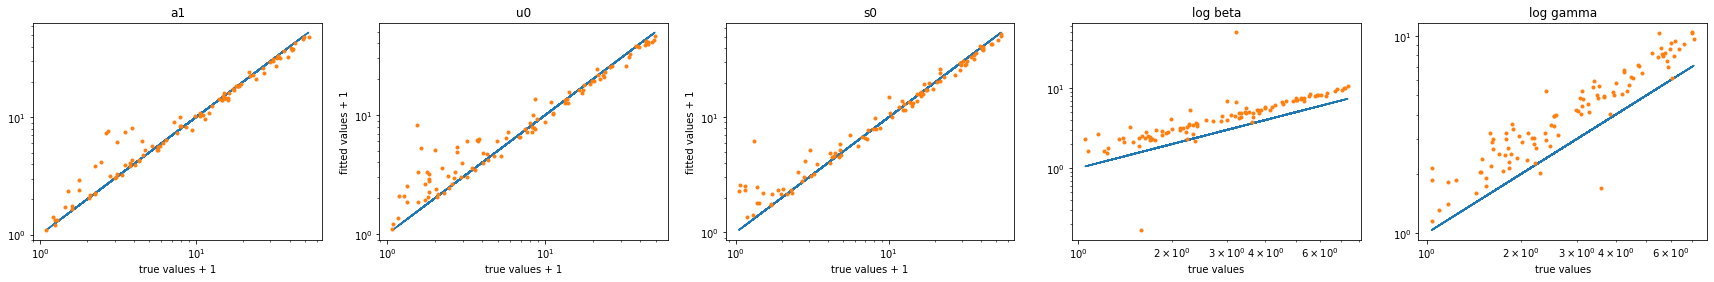

In [23]:
plot_theta(true_theta[100:],traj.theta[100:])

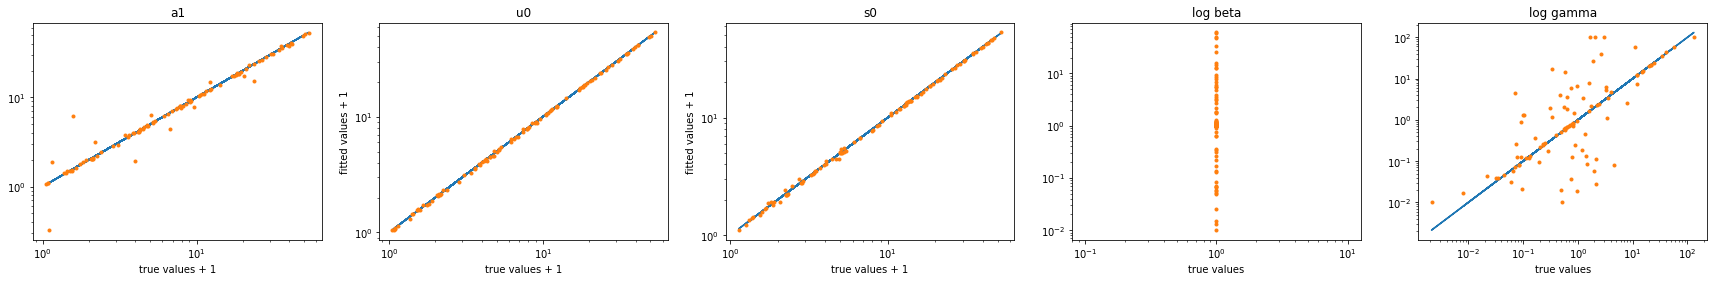

In [24]:
plot_theta(true_theta[:100],traj.theta[:100])

In [ ]:
plot_phase(X,traj.theta[:20],Q,topo,tau)

In [25]:
accepts = []
diffs = []
true_positive = 0
for j in range(100):
    nested_model = {j:[[0,-3],[-4,-4]]}
    accept, diff = traj.compare_model(X, nested_model)
    true_positive += accept
    accepts.append(accept)
    diffs.append(diff)


In [28]:
accepts = []
diffs = []
false_positive = 0
for j in range(100,200):
    nested_model = {j:[[0,-3],[-4,-4]]}
    accept, diff = traj.compare_model(X, nested_model)
    false_positive += accept
    accepts.append(accept)
    diffs.append(diff)


In [29]:
true_positive,false_positive

(95, 0)

## Partially changing genes

In [ ]:
import numpy as np

def simulate_data_with_partial_null(topo, tau, n, p, null_p = 10, loga_max=4, logb_max=2, random_seed=42):
    np.random.seed(random_seed)
    L=len(topo)
    n_states=len(set(topo.flatten()))
    assert n_states > 1
    t=np.linspace(tau[0],tau[-1],n)
    true_t = []
    
    theta=np.zeros((p,n_states+4))
    for j in range(n_states+2):
        theta[:,j]=np.exp(np.random.uniform(0,loga_max,size=p))-1
    theta[:,-2]=np.exp(np.random.uniform(0,logb_max,size=p))
    theta[:,-1]=np.exp(np.random.uniform(0,logb_max,size=p))

    theta[:null_p,1]=theta[:null_p,0]

    Y = np.zeros((n*L,p,2))
    for l in range(L):
        theta_l = np.concatenate((theta[:,topo[l]], theta[:,-4:]), axis=1)
        Y[l*n:(l+1)*n] = get_Y(theta_l,t,tau) # m*p*2
        true_t = np.append(true_t,t)

    X = np.random.poisson(Y)
    return theta, true_t, Y, X

In [ ]:
#%% generate data
topo = np.array([[0,1]])
tau = (0,0.5,1)
true_theta, t, Y, X = simulate_data_with_partial_null(topo,tau,n=2000,p=100,random_seed=2023)

p = 20
fig, ax = plt.subplots(1,p,figsize=(6*p,4))
for i in range(p):
    ax[i].set_title(str(i));
    ax[i].scatter(X[:,i,0],X[:,i,1],c=t);
    ax[i].scatter(Y[:,i,0],Y[:,i,1],c='black');
# time increases from blue to yellow

In [ ]:
traj = Trajectory(topo, tau)
res = traj.fit_multi_init(X,100,n_init=10,epoch=10,parallel=True,n_threads=2)

In [ ]:
Q, elbos, thetas = res
plt.plot(elbos);

In [ ]:
plot_theta(true_theta[10:],traj.theta[10:])

In [ ]:
plot_phase(X,traj.theta[:20],Q,topo,tau)

In [ ]:
accepts = []
diffs = []
for j in range(20):
    nested_model = {j:[[1],[0]]}
    accept, diff = traj.compare_model(X, nested_model, parallel=True, n_threads=2)
    accepts.append(accept)
    diffs.append(diff)

In [ ]:
plt.plot(accepts);

In [ ]:
plot_phase(X,traj.new_theta[:20],Q,topo,tau)

In [ ]:
plt.plot(diffs)